In [58]:
import torch
import torchvision
import torchvision.transforms as transforms

import sys
sys.path.append('../')
from data_handler import CIFAR10_captioning

In [59]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = CIFAR10_captioning(root='./data', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
                                          
testset = CIFAR10_captioning(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = trainset.classes
print(classes)

Files already downloaded and verified
Files already downloaded and verified
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


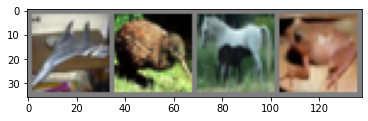

tensor([[14,  0,  1,  2,  3,  4, 15],
        [14,  0,  1,  2,  3,  6, 15],
        [14,  0,  1,  2,  3, 11, 15],
        [14,  0,  1,  2,  3, 10, 15]])
SOS An image of a plane EOS
SOS An image of a bird EOS
SOS An image of a horse EOS
SOS An image of a frog EOS


In [60]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)
for b in range(batch_size):
    print(' '.join([trainset.vocab[int(i)] for i in labels[b]]))

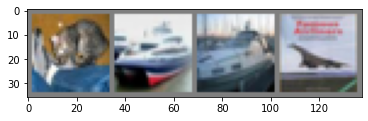

tensor([[14,  0,  1,  2,  3,  7, 15],
        [14,  0,  1,  2,  3, 12, 15],
        [14,  0,  1,  2,  3, 12, 15],
        [14,  0,  1,  2,  3,  4, 15]])
SOS An image of a cat EOS
SOS An image of a ship EOS
SOS An image of a ship EOS
SOS An image of a plane EOS


In [61]:
# get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)
for b in range(batch_size):
    print(' '.join([trainset.vocab[int(i)] for i in labels[b]]))

In [62]:
print(images[0].size())

torch.Size([3, 32, 32])
